### 1.  Problem Statement


Predict the price range of a mobile phone (low/medium/high/very high) based on features such as RAM, battery power, screen size, etc.

### 2. Import Libraries


In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display_html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 3. Importing Dataset

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')

### 4. Data Understanding

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

* 0: Low Cost

* 1: Medium Cost

* 2: High Cost

* 3: Very High Cost

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No Missing Valus Found.

### 4. Exploratory Data Analysis(EDA)

#### 🔹 6.1 Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between multiple variables. Each cell in the table shows the correlation between two variables.

* Correlation measures the linear relationship between two variables.

* The value ranges from -1 to +1:

  *  +1 means a perfect positive correlation: as one variable increases, the other increases.

  * -1 means a perfect negative correlation: as one increases, the other decreases.

  * 0 means no linear correlation.

We use the correlation matrix to:

* Understand relationships between features.

* Detect multicollinearity (high correlation between independent variables).

* Select features for modeling.

In this project, we'll visualize it using a heatmap to easily spot strong relationships.



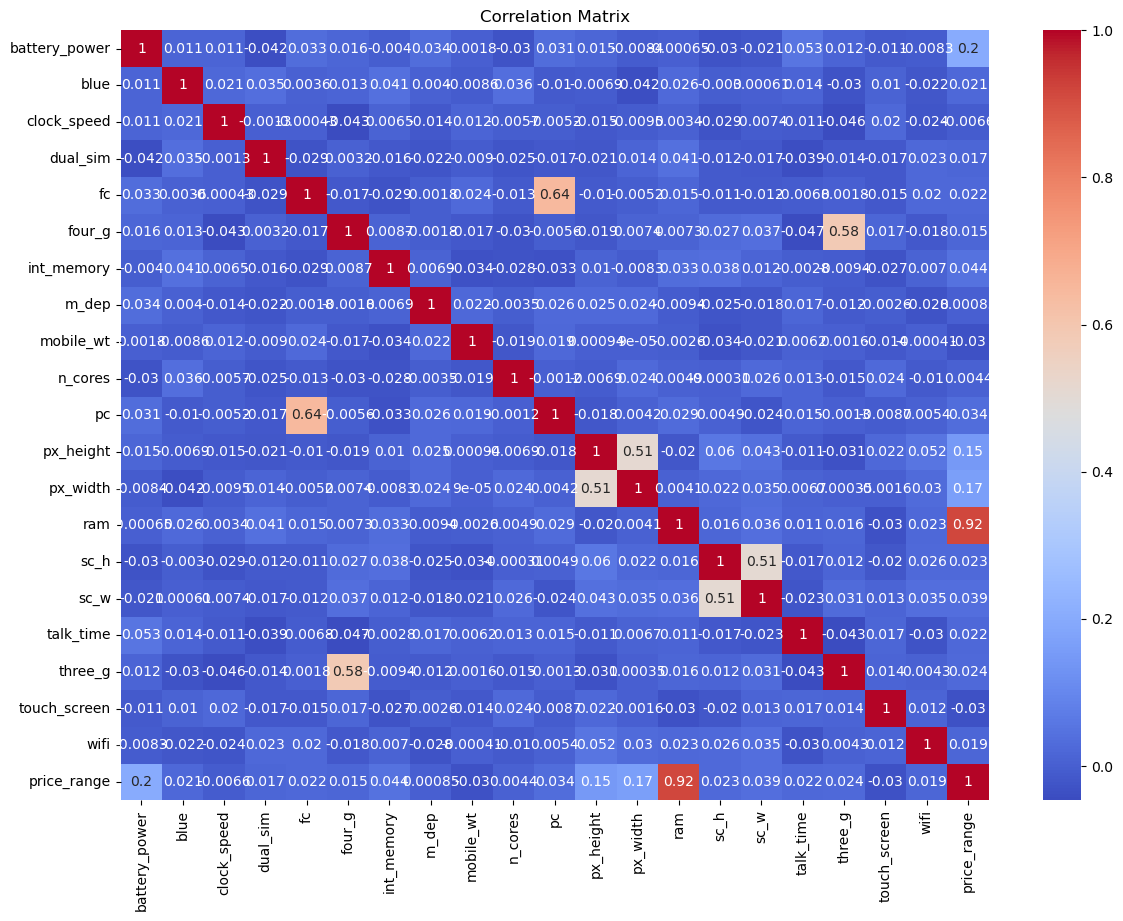

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

####  🔹 6.2 Feature Distribution by Price Range

In this section, we visualize how RAM and Battery Power vary across different Price Ranges using boxplots.

* A boxplot displays the distribution of a numeric feature and highlights the median, quartiles, and potential outliers.

* We compare:

  *  RAM vs Price Range — to observe how memory size relates to pricing.

  *  Battery Power vs Price Range — to see how battery capacity impacts price.

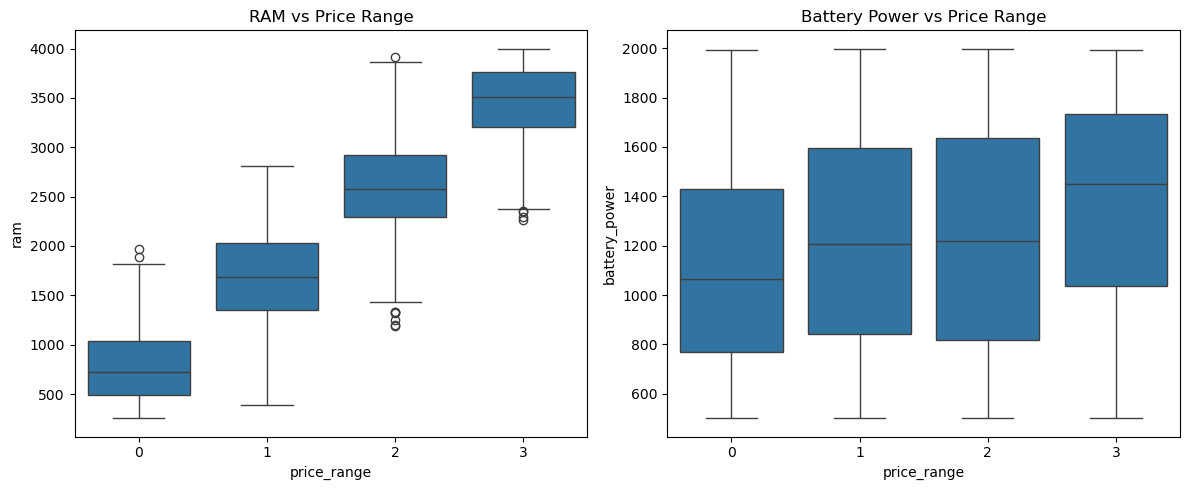

In [9]:
# Set the figure size
plt.figure(figsize=(12, 5))  # width, height in inches

# Plot 1: RAM vs Price
plt.subplot(1, 2, 1)  # (rows, columns, position)
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM vs Price Range")

# Plot 2: Battery Power vs Price
plt.subplot(1, 2, 2)
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power vs Price Range")

# Show the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='price_range', ylabel='ram'>

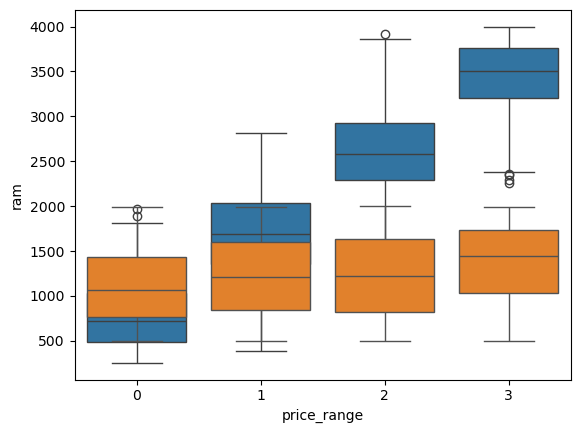

In [10]:
sns.boxplot(x='price_range', y='ram', data=df)
sns.boxplot(x='price_range', y='battery_power', data=df)

### 7. Data Preprocessing


#### 🔹 7.1 Split Features and Target

In [11]:
X = df.drop('price_range', axis=1)
y = df['price_range']

#### 🔹 7.2 Feature Scalling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 🔹 7.3 Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 8. Model Building

#### 🔹 8.1 logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9775


#### 🔹 8.2 Random Forest

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8925


### 9. Model Evalution

#### 🔹 9.1 Classification Report

In [16]:
# Create classification reports
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert to styled DataFrames
df_lr = pd.DataFrame(report_lr).transpose().style.background_gradient(cmap='Blues').format(precision=2)
df_rf = pd.DataFrame(report_rf).transpose().style.background_gradient(cmap='Greens').format(precision=2)

# Convert to HTML with width set
lr_html = df_lr.set_table_attributes("style='width:100%'").to_html()
rf_html = df_rf.set_table_attributes("style='width:100%'").to_html()

# Full HTML with separate titles above each table
html = f"""
<div style="display: flex; justify-content: space-between; gap: 20px;">
    <div style="width:48%;">
        <div style="text-align:center;"><h3> Logistic Regression Classification Report</h3></div>
        {lr_html}
    </div>
    <div style="width:48%;">
        <div style="text-align:center;"><h3> Random Forest Classification Report</h3></div>
        {rf_html}
    </div>
</div>
"""

# Display both side by side with titles
display_html(html, raw=True)


,precision,recall,f1-score,support
0,1.00,0.97,0.99,105.00
1,0.95,1.00,0.97,91.00
2,0.99,0.95,0.97,92.00
3,0.97,0.99,0.98,112.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,400.00
weighted avg,0.98,0.98,0.98,400.00
,precision,recall,f1-score,support
0,0.95,0.96,0.96,105.00
1,0.89,0.87,0.88,91.00


#### 🔹 9.2 Confusion Matrix

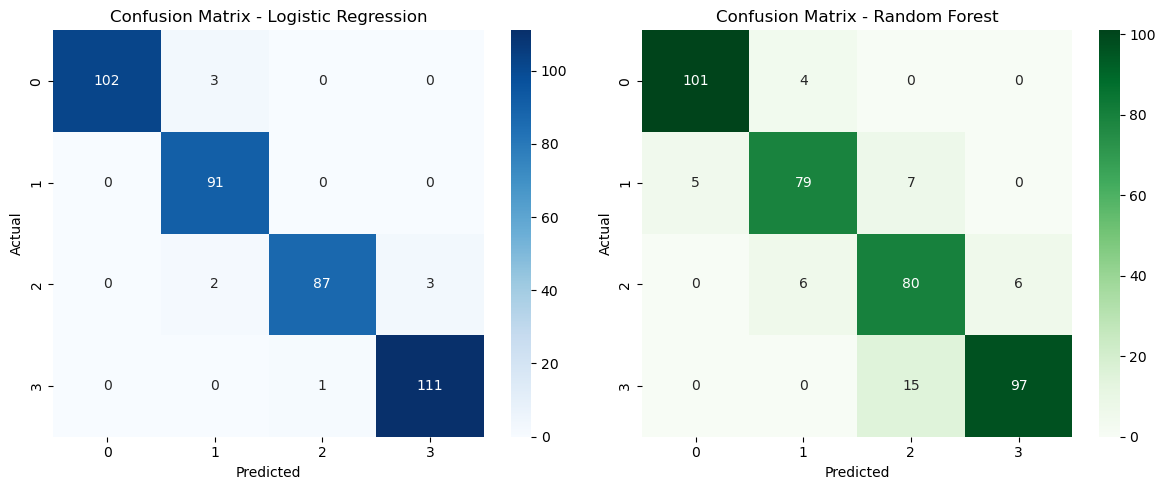

In [17]:
# Generate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


### 10. Saving the Best Model

In [18]:
joblib.dump(lr, 'logistic_model.pkl')

['logistic_model.pkl']